In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


# Data_Loading

In [44]:
df=pd.read_csv(r"https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv") 
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

# EDA

In [5]:
df. shape


(1067, 13)

In [6]:
df.isna().sum() 

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df. describe ()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [8]:
%matplotlib inline

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


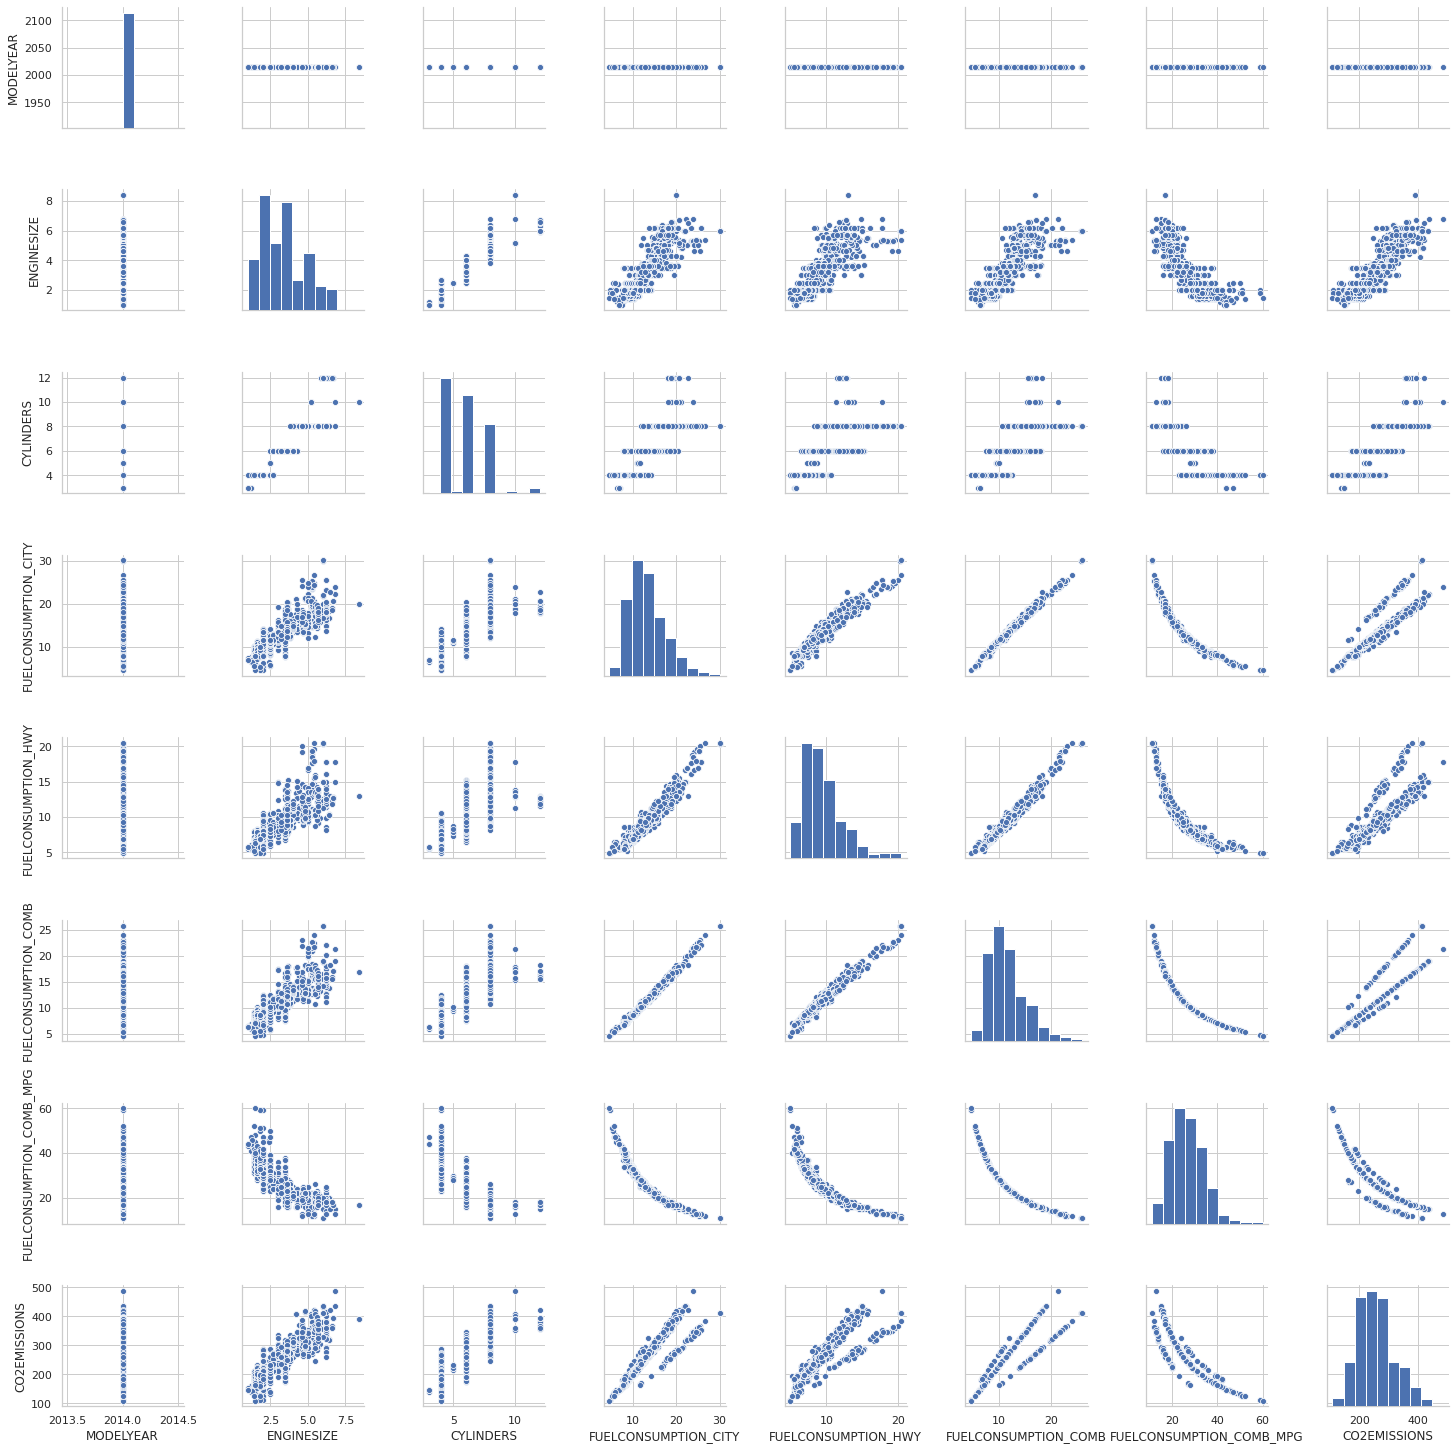

In [99]:
sns.set(style='whitegrid',color_codes=True)
sns.pairplot(df,palette='husl')

# Model_Inputs

In [45]:
X=df.drop(['FUELCONSUMPTION_COMB_MPG','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'],axis=1)
y=df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)
y.shape

(1067, 1)

# Test & Train Selection

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
LR=LinearRegression()

# Train Model Scores

In [50]:
LR.fit(X_train,y_train)

LinearRegression()

In [51]:
LR.score(X_train,y_train)

0.9041633558736197

In [52]:
y_train_pred=LR.predict(X_train)

In [53]:
PREDICTED_FUELCONSUMPTION_COMB_MPG=pd.Series(y_train_pred.reshape(-1),name='PREDICTED_FUELCONSUMPTION_COMB_MPG',index=range(0,800))

In [54]:
ACTUAL_FUELCONSUMPTION_COMB_MPG=pd.Series(y_train.reshape(-1),name='ACTUAL_FUELCONSUMPTION_COMB_MPG',index=range(0,800))

In [55]:
compare=pd.concat([ACTUAL_FUELCONSUMPTION_COMB_MPG,PREDICTED_FUELCONSUMPTION_COMB_MPG],axis=1)

# Comparing Actual and Predicted Values-Train Model

In [56]:
compare

ACTUAL_FUELCONSUMPTION_COMB_MPG  PREDICTED_FUELCONSUMPTION_COMB_MPG
0                                 25                           26.293481
1                                 38                           36.563911
2                                 34                           33.516336
3                                 32                           32.051831
4                                 41                           37.432899
..                               ...                                 ...
795                               24                           25.580630
796                               35                           33.525922
797                               23                           23.003794
798                               22                           24.152949
799                               41                           35.378084

[800 rows x 2 columns]

In [57]:
from sklearn.metrics import mean_squared_error

# Train Error

In [58]:
TRAIN_ERROR=mean_squared_error(y_train,y_train_pred)
print(TRAIN_ERROR)

5.450095780165466


In [59]:
from sklearn.metrics import r2_score

# Train R2_Score

In [60]:
R2_TRAIN=r2_score(y_train,y_train_pred)
print(R2_TRAIN)

0.9041633558736197


# TESTING THE MODEL

In [61]:
LR.fit(X_test,y_test)

LinearRegression()

# Test Scores

In [62]:
LR.score(X_test,y_test)

0.9003668021948038

In [63]:
y_test_pred=LR.predict(X_test)
y_test_pred.shape

(267, 1)

In [64]:
PREDICTED_TEST_FUELCONSUMPTION_COMB_MPG=pd.Series(y_test_pred.reshape(-1),name='PREDICTED_TEST_FUELCONSUMPTION_COMB_MPG',index=range(0,267))

In [65]:
ACTUAL_TEST_FUELCONSUMPTION_COMB_MPG=pd.Series(y_test.reshape(-1),name='ACTUAL_TEST_FUELCONSUMPTION_COMB_MPG',index=range(0,267))

# Comparing Actual and Predicted Values-Test Model

In [66]:
compare_Test=pd.concat([ACTUAL_TEST_FUELCONSUMPTION_COMB_MPG,PREDICTED_TEST_FUELCONSUMPTION_COMB_MPG],axis=1)

In [67]:
compare_Test

ACTUAL_TEST_FUELCONSUMPTION_COMB_MPG  \
0                                      26   
1                                      24   
2                                      29   
3                                      25   
4                                      16   
..                                    ...   
262                                    34   
263                                    25   
264                                    23   
265                                    18   
266                                    45   

     PREDICTED_TEST_FUELCONSUMPTION_COMB_MPG  
0                                  26.604934  
1                                  24.559724  
2                                  29.489558  
3                                  26.772095  
4                                  11.357224  
..                                       ...  
262                                37.127203  
263                                28.286339  
264                                24.409952  
265                                18.422989  
266                                40.102189  

[267 rows x 2 columns]

In [68]:
from sklearn.metrics import mean_squared_error

# Test_Error

In [69]:
TEST_ERROR=mean_squared_error(y_test,y_test_pred)
print(TEST_ERROR)

5.2118019694386675


In [70]:
from sklearn.metrics import r2_score

# Test R2_Score

In [71]:
R2_TEST=r2_score(y_test,y_test_pred)
print(R2_TEST)

0.9003668021948038


# Train & Test Values

In [72]:
print('TRAIN_ERROR :',TRAIN_ERROR) 
print('TEST_ERROR  :',TEST_ERROR)
print('R2_TRAIN    :',R2_TRAIN)
print('R2_TEST     :',R2_TEST)

TRAIN_ERROR : 5.450095780165466
TEST_ERROR  : 5.2118019694386675
R2_TRAIN    : 0.9041633558736197
R2_TEST     : 0.9003668021948038


# Final Error-Combined

In [73]:
overall_LR=LinearRegression()
overall_LR.fit(X,y)
overall_LR_pred=overall_LR.predict(X)
overall_Error=mean_squared_error(y,overall_LR_pred)
print('OVERALL_ERROR_COMBINED :',overall_Error)

OVERALL_ERROR_COMBINED : 5.4856183583094795
